In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
df.tail()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df = df.drop('CustomerID', axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [12]:
df.describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Gender'], dtype='object')

Numerical type columns:
Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [14]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [15]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [16]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Gender']
Non-Categorical Features: []
Discrete Features: []
Continuous Features: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [17]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Gender
['Male' 'Female']



In [18]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Gender
Gender
Female    112
Male       88
Name: count, dtype: int64



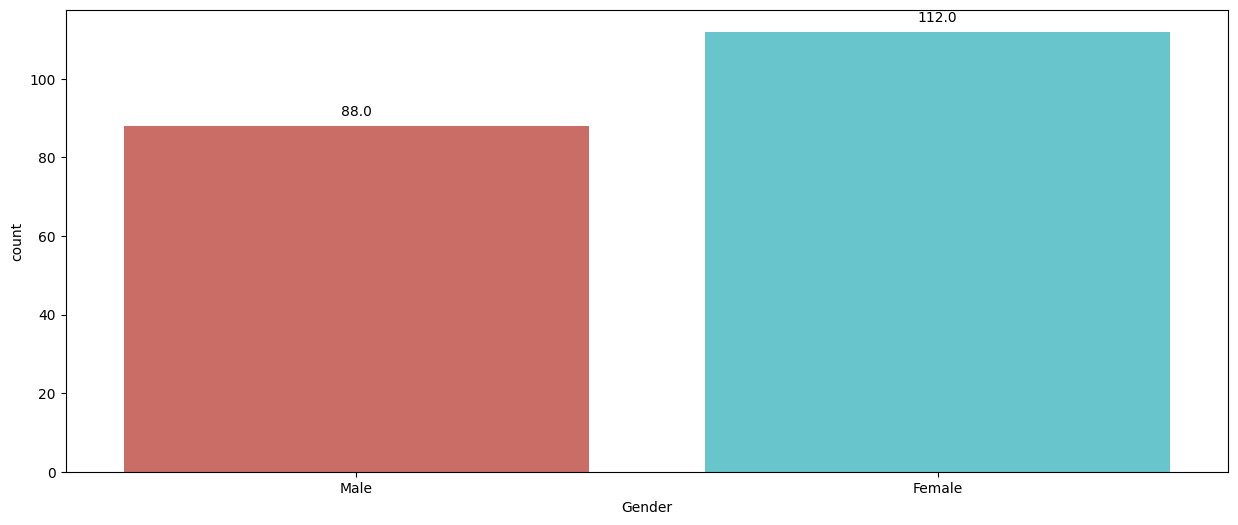

In [19]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

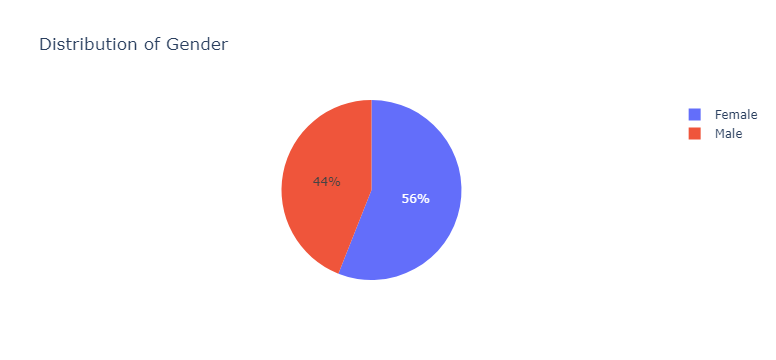

In [20]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

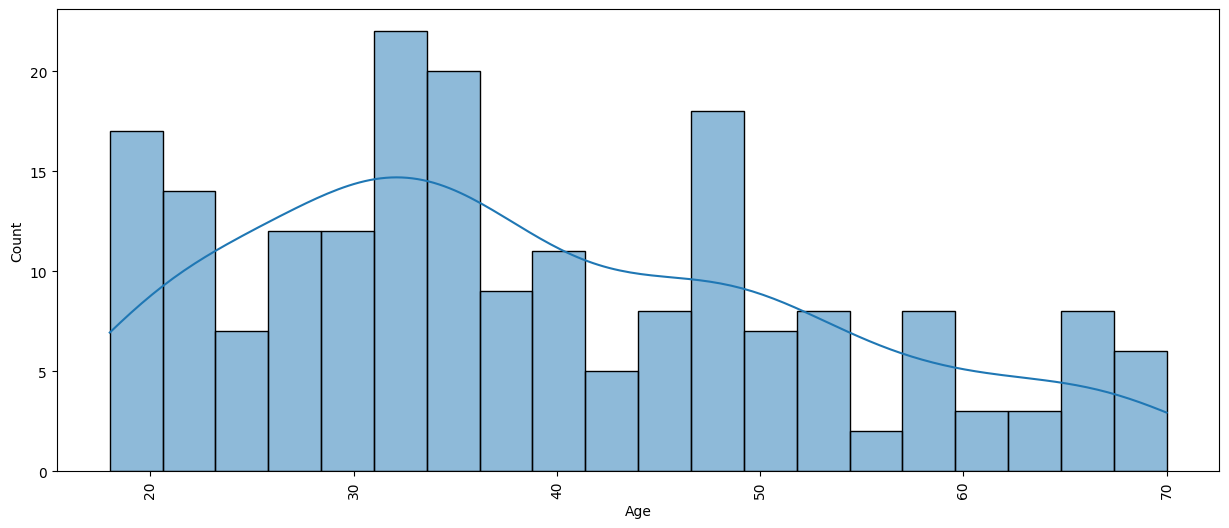

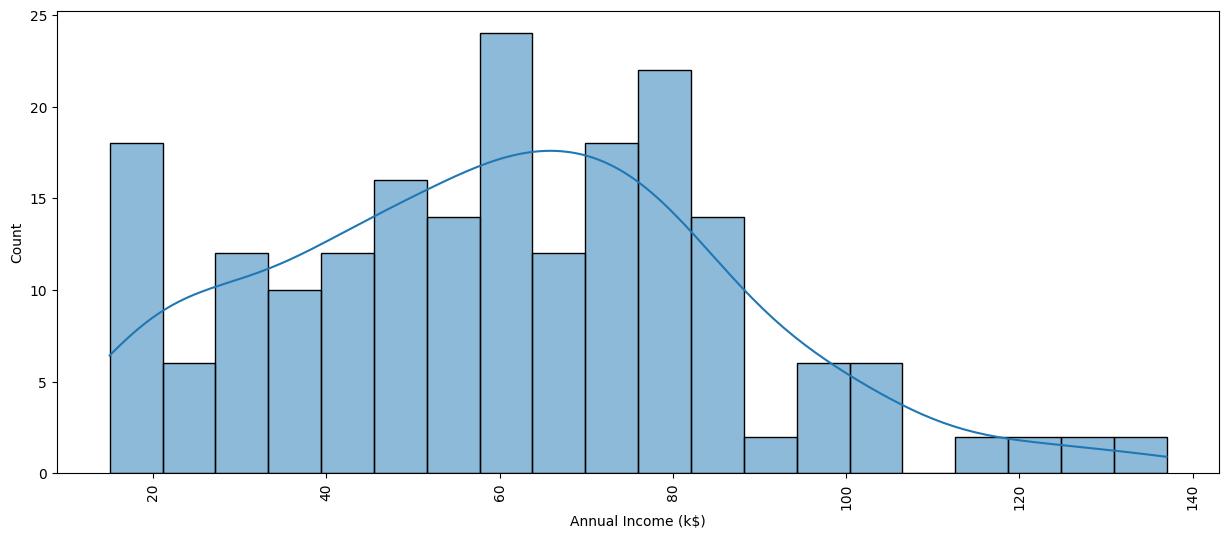

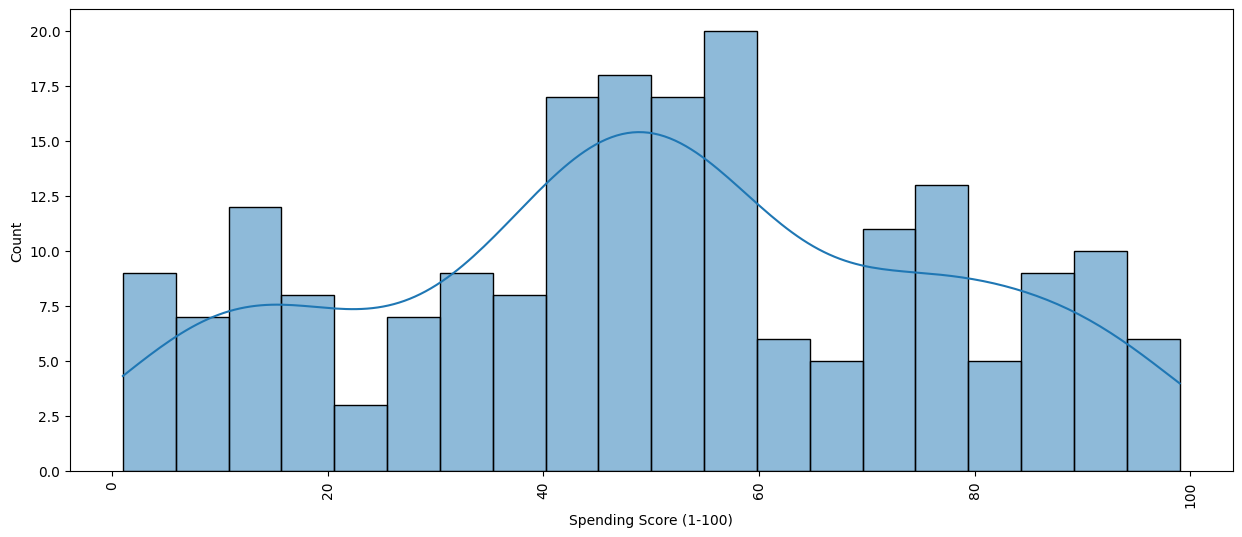

In [21]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

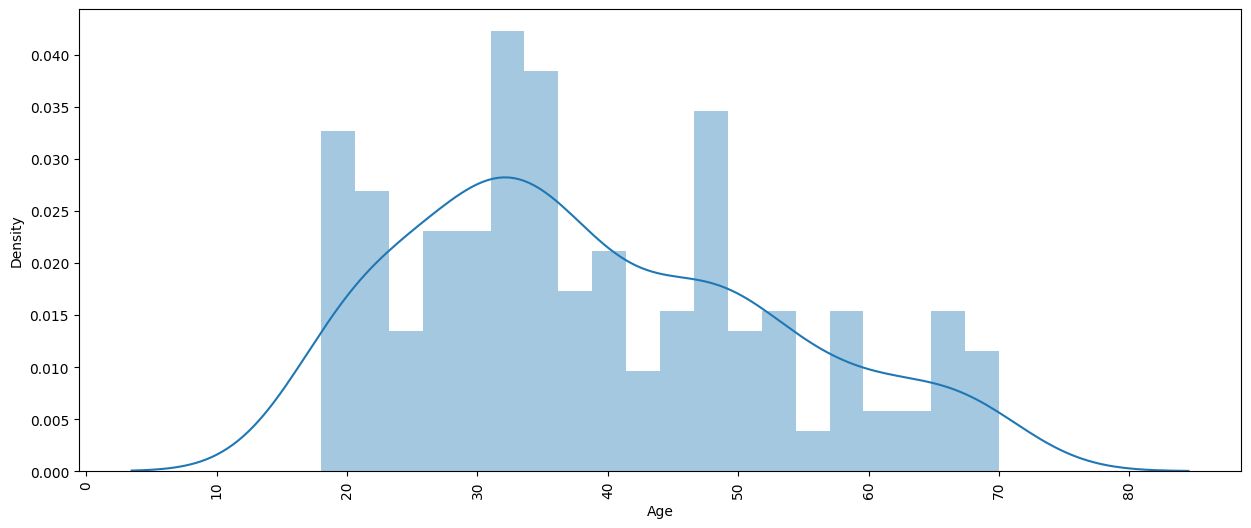

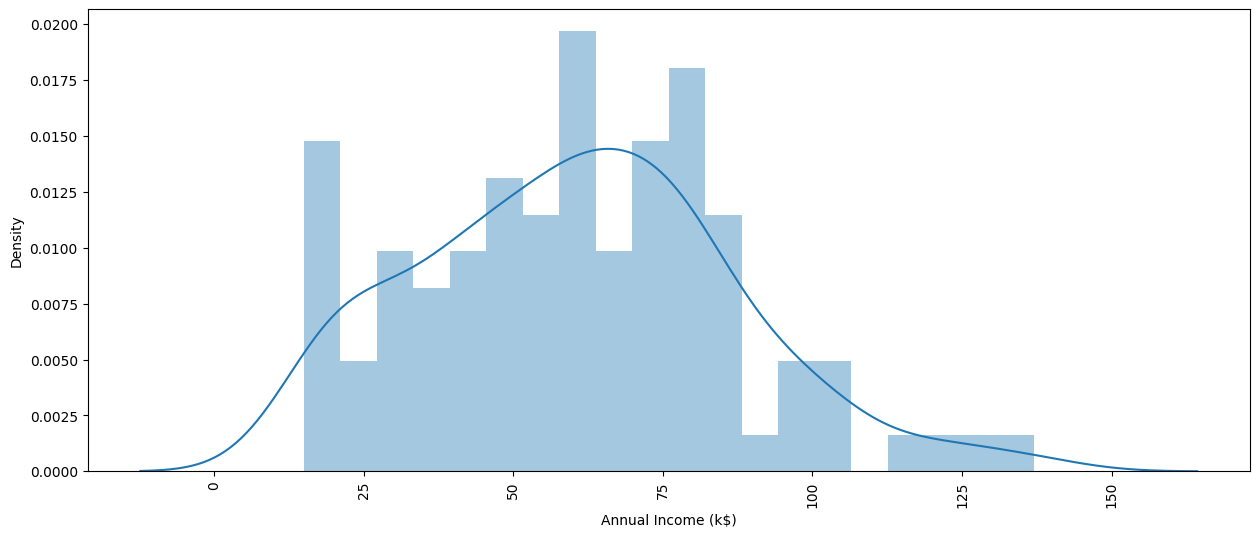

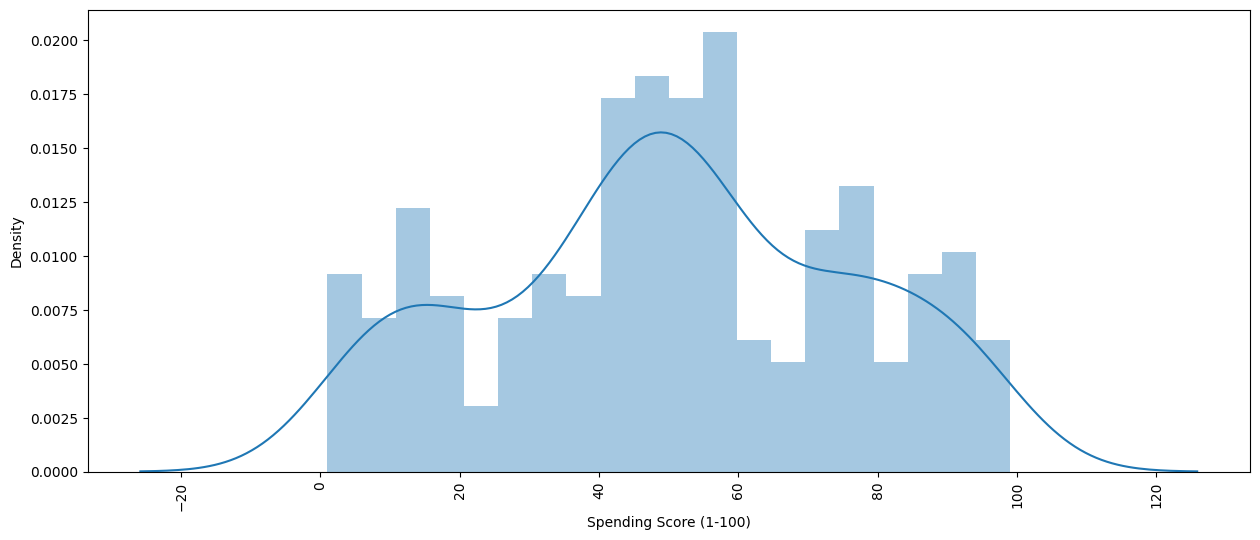

In [22]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

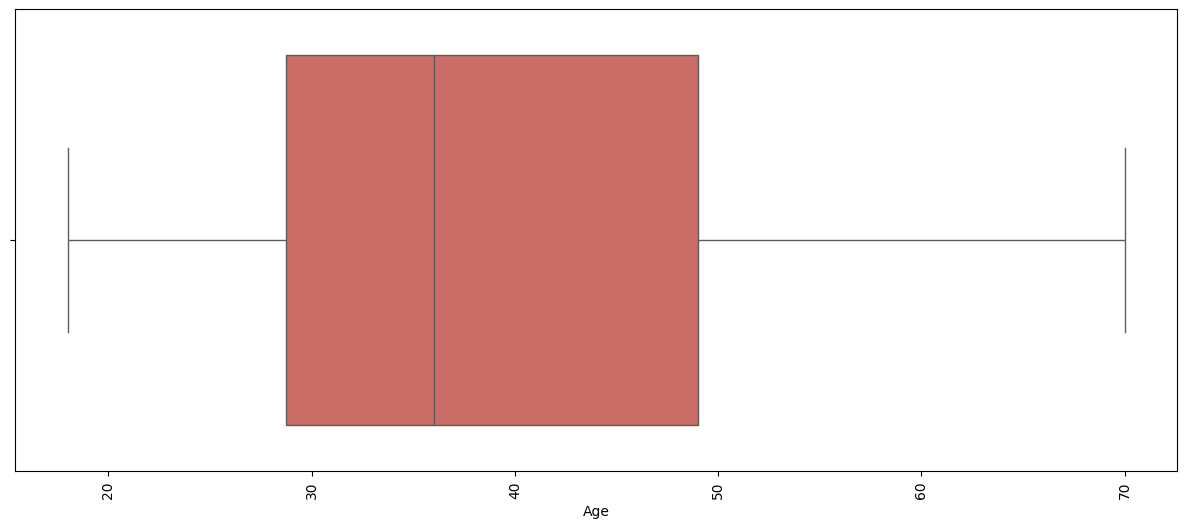

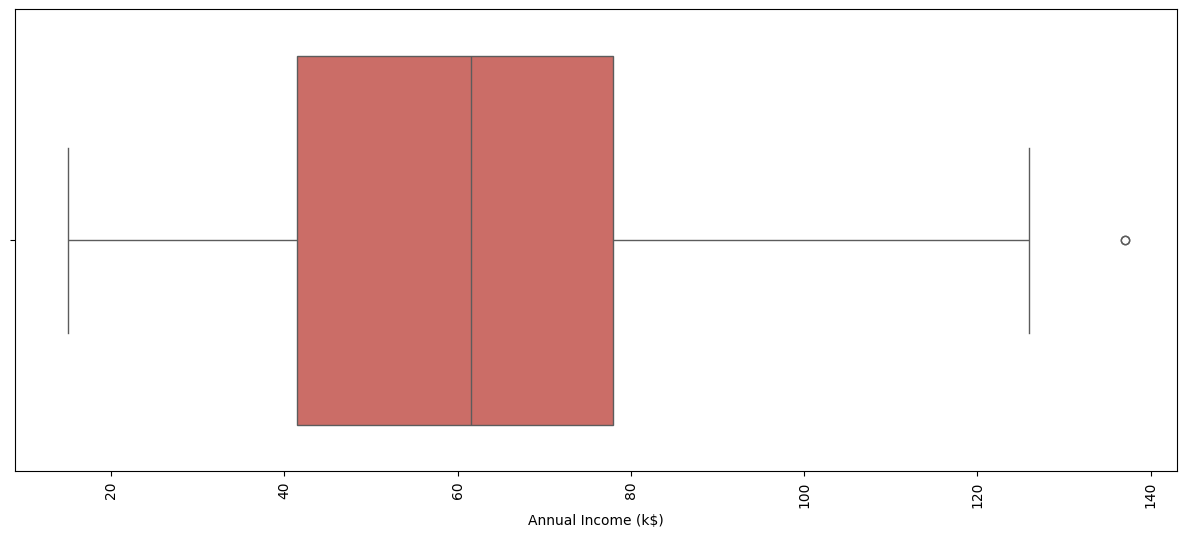

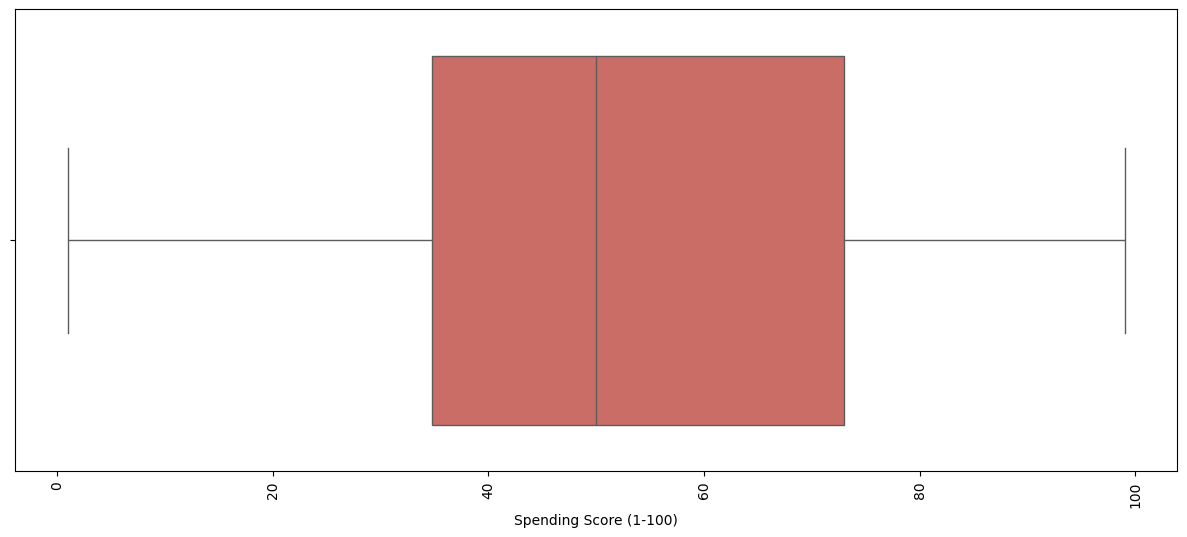

In [23]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

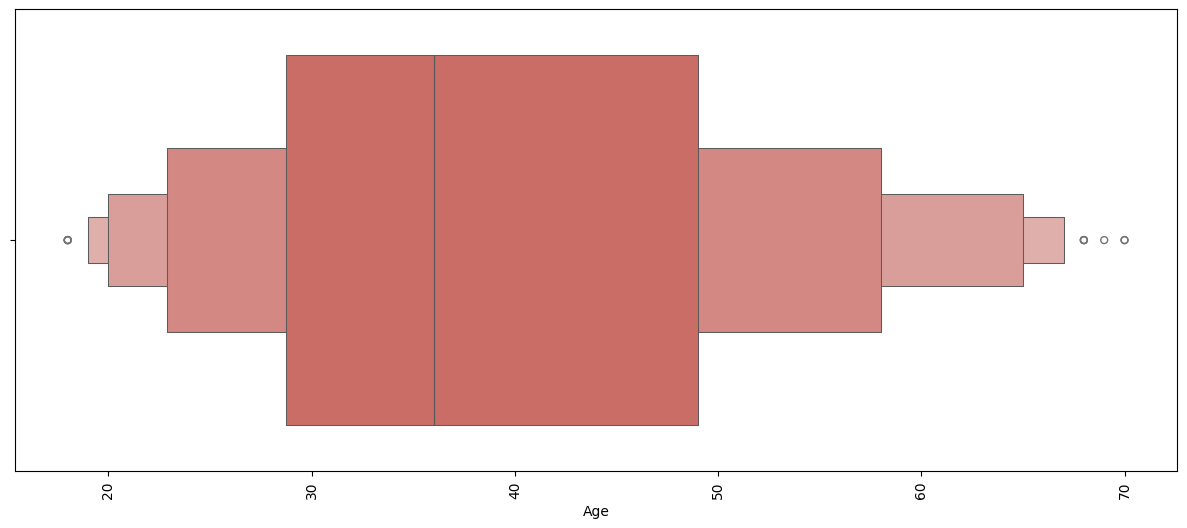

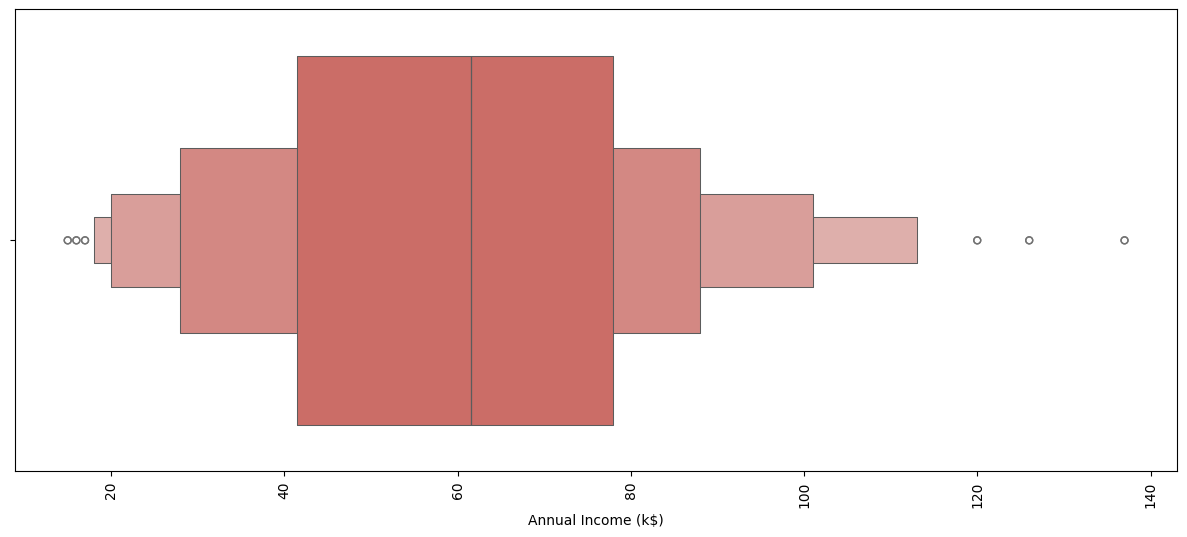

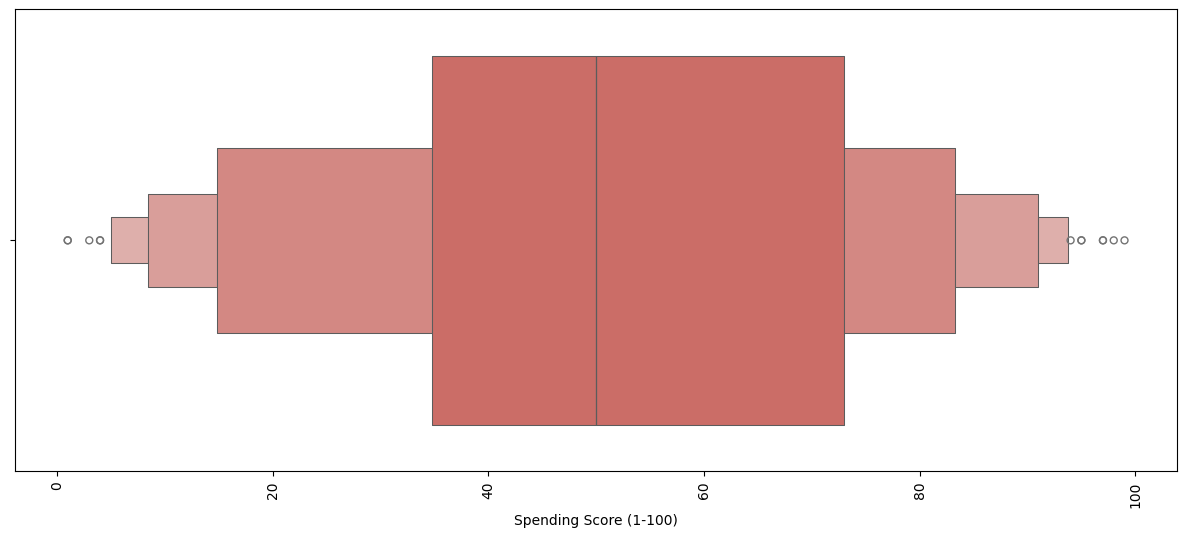

In [24]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

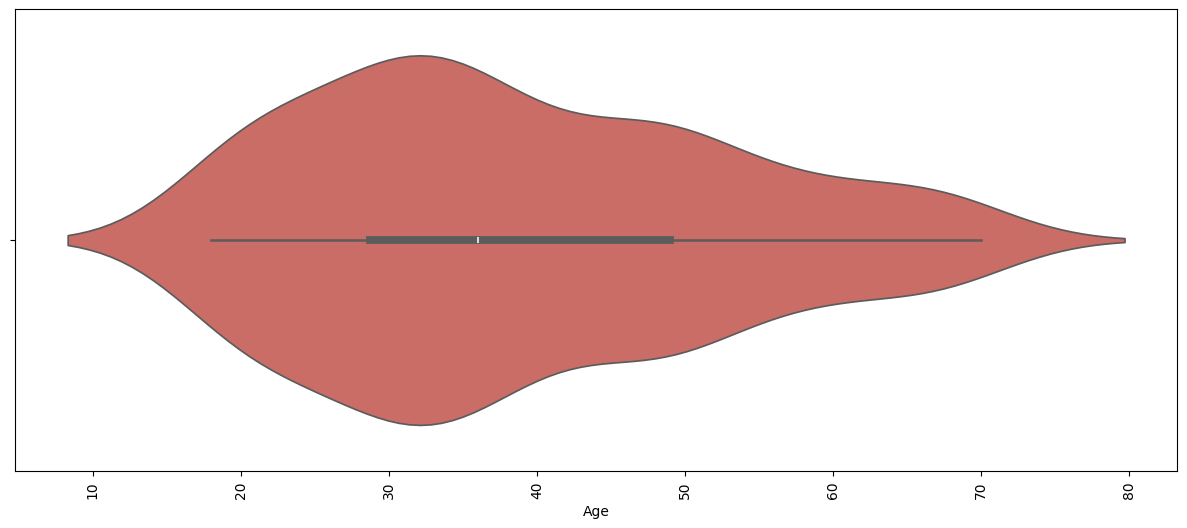

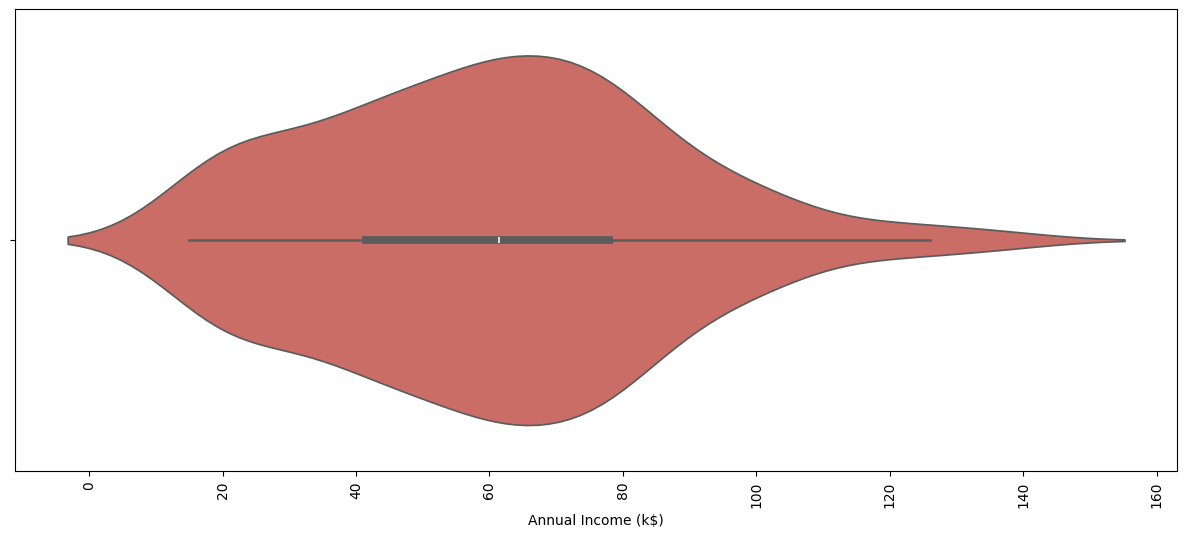

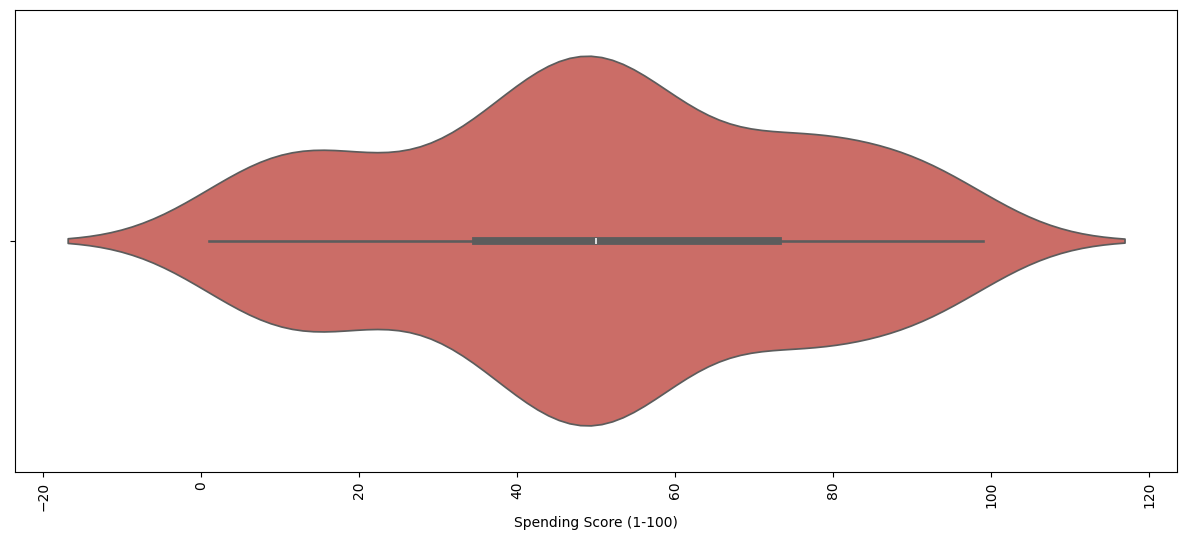

In [25]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

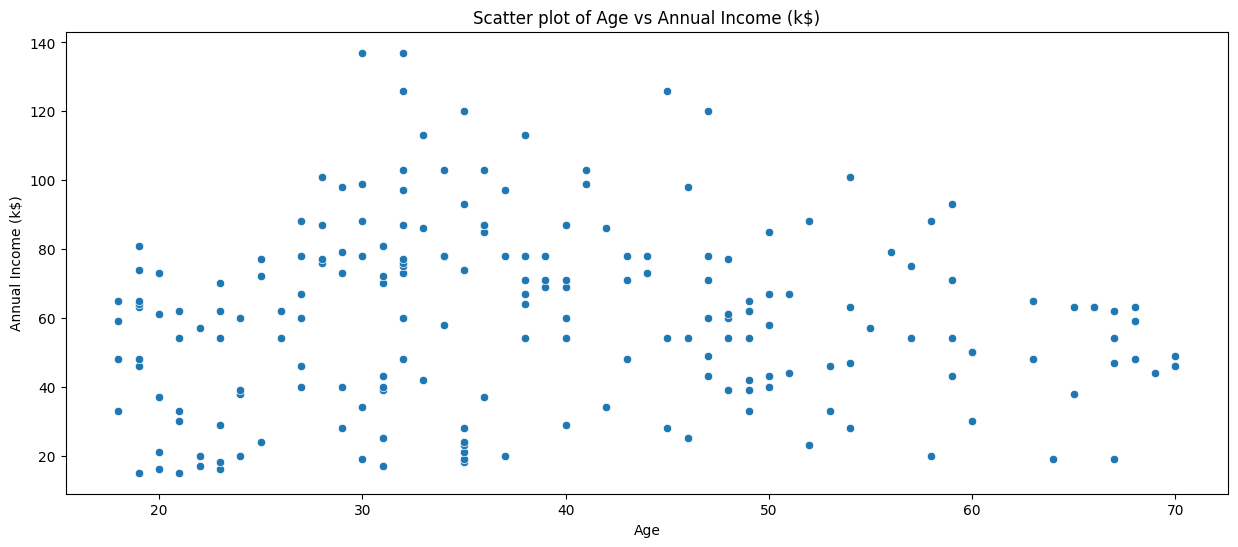

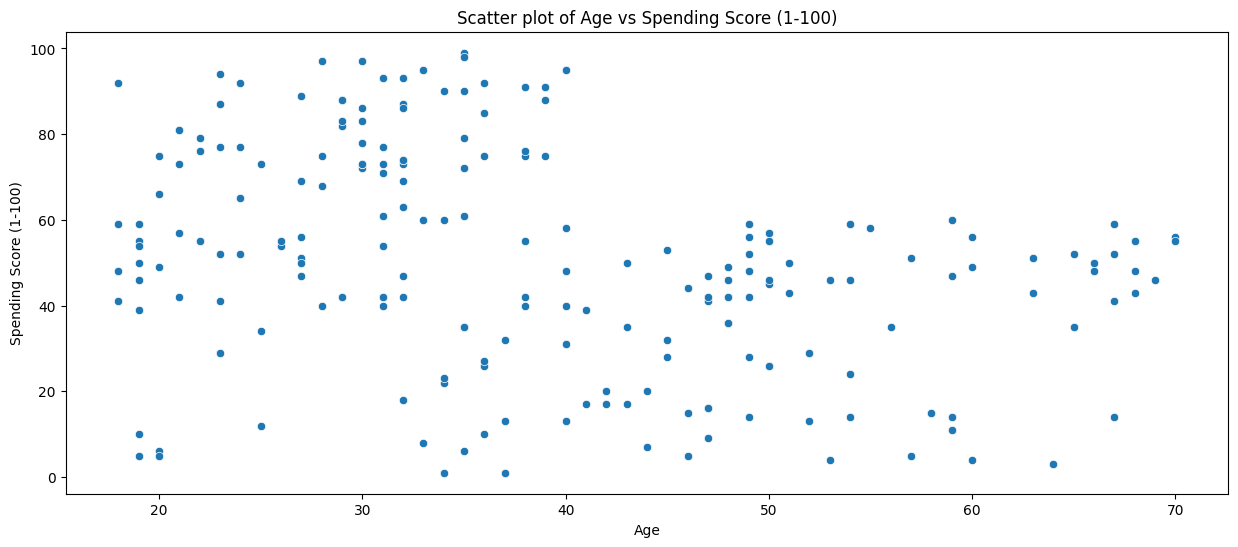

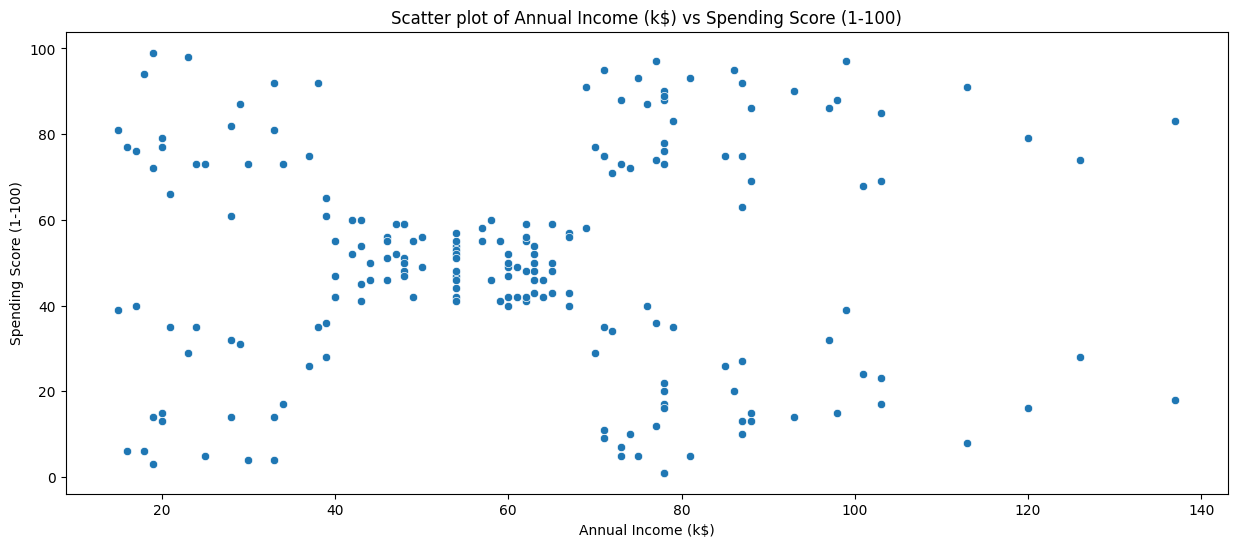

In [26]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

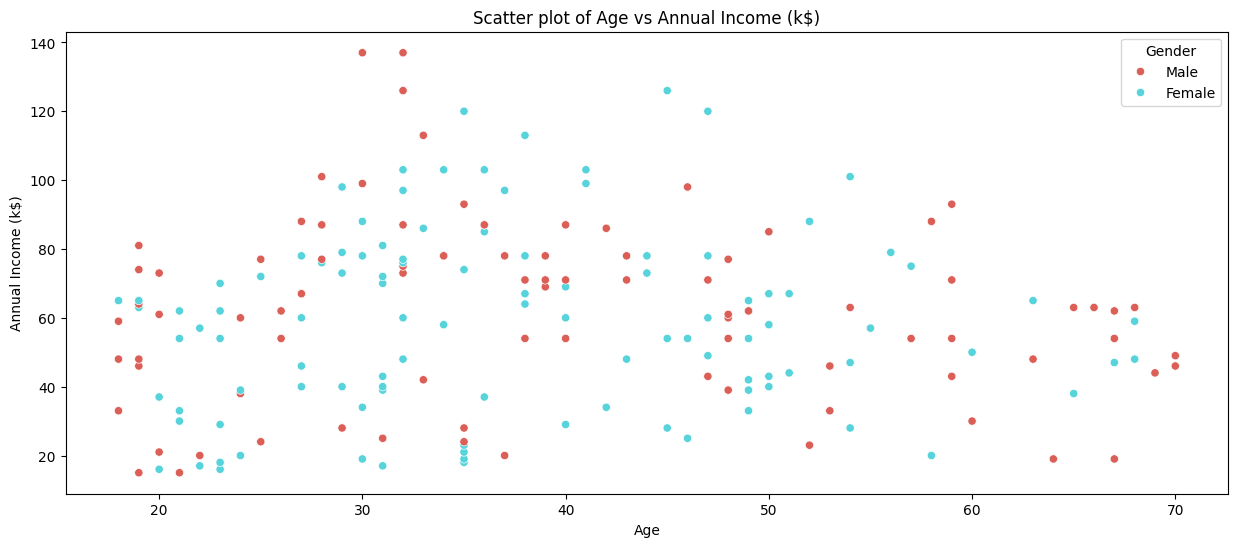

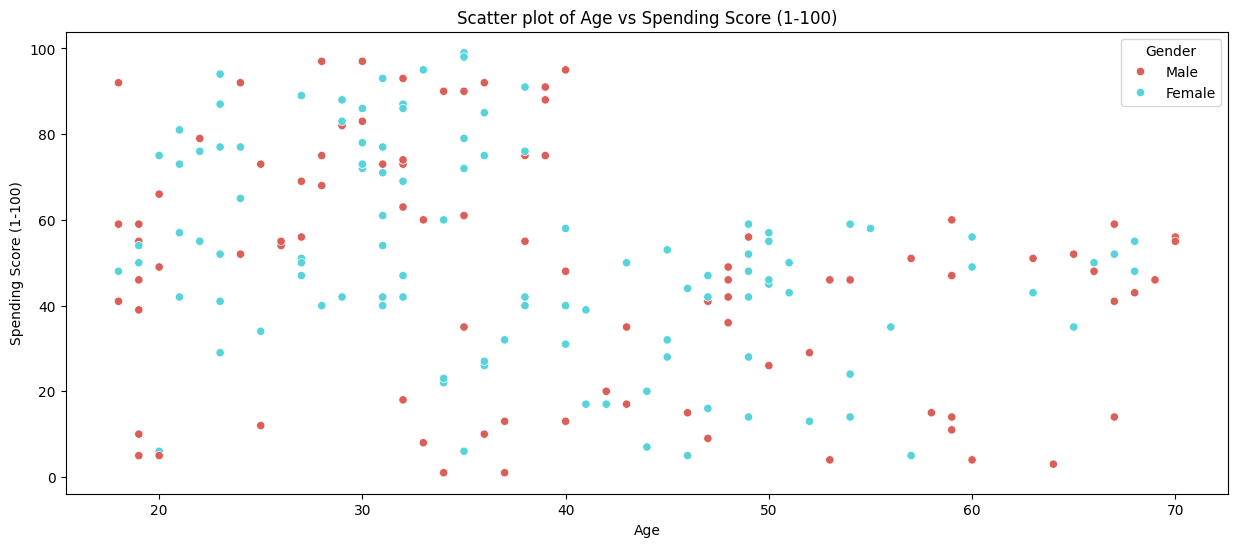

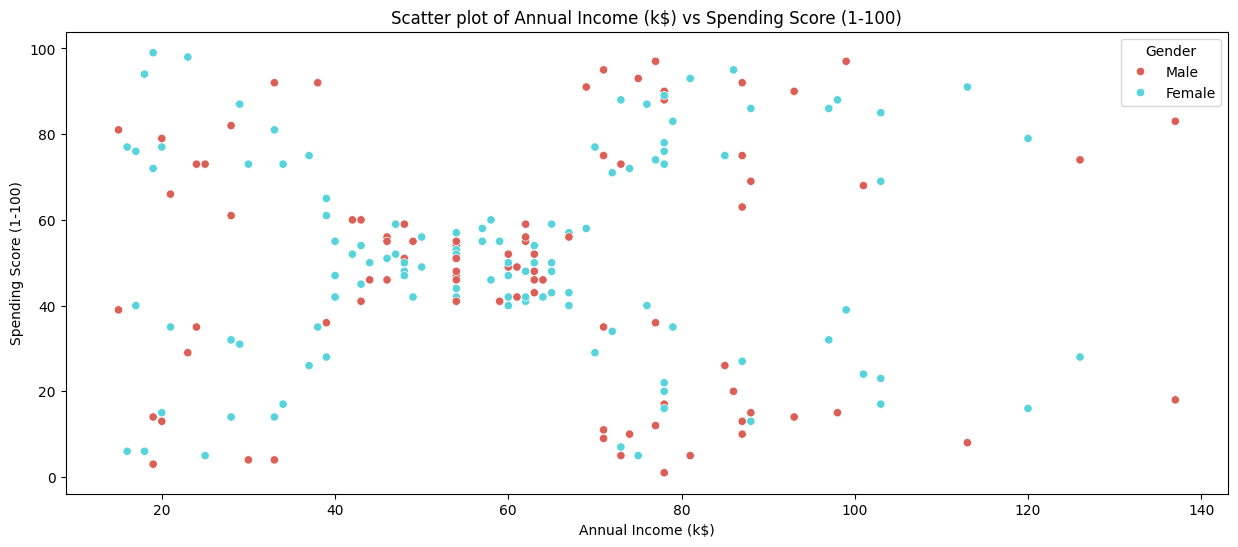

In [28]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df,hue = 'Gender', palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

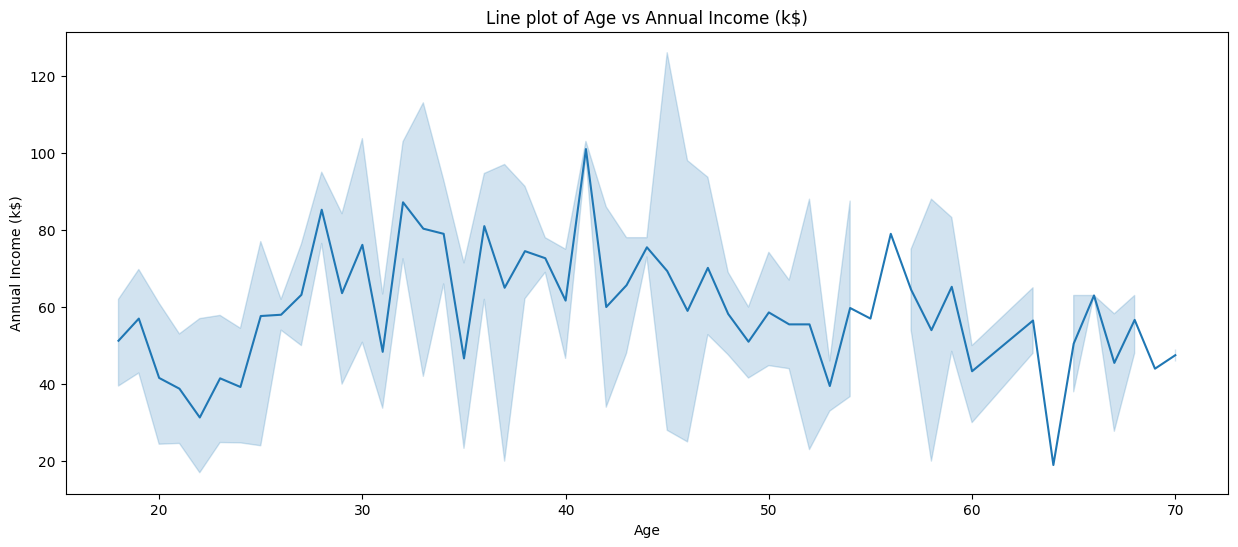

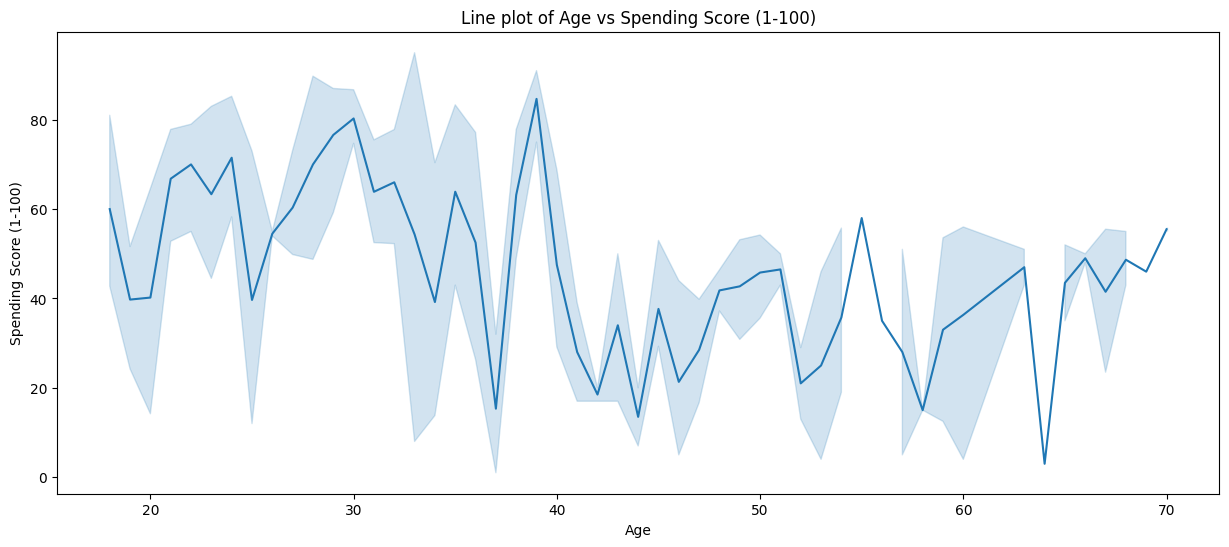

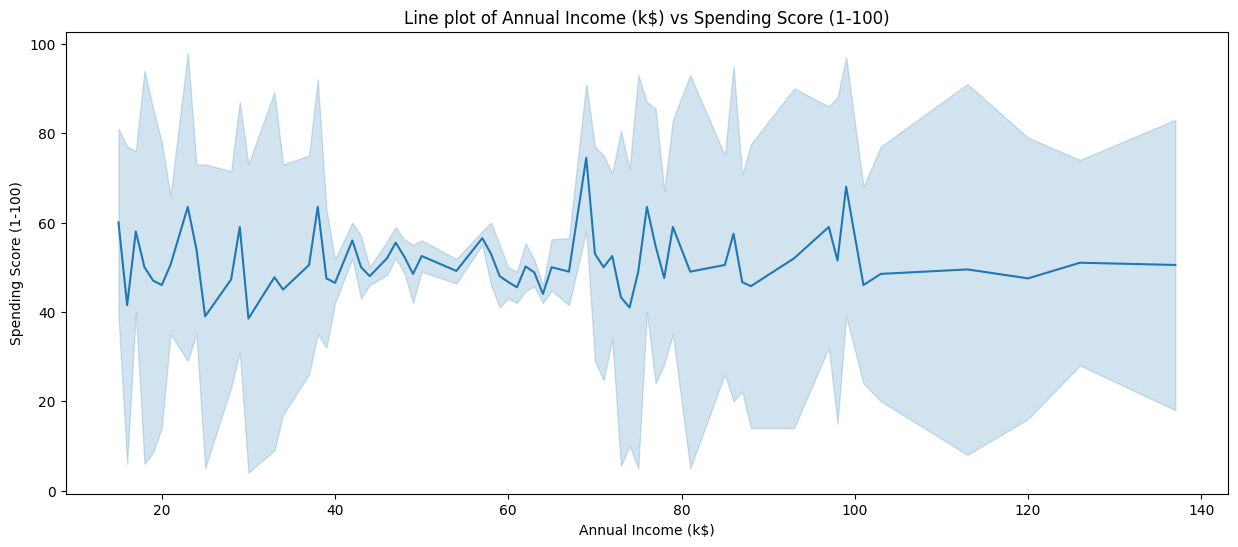

In [27]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

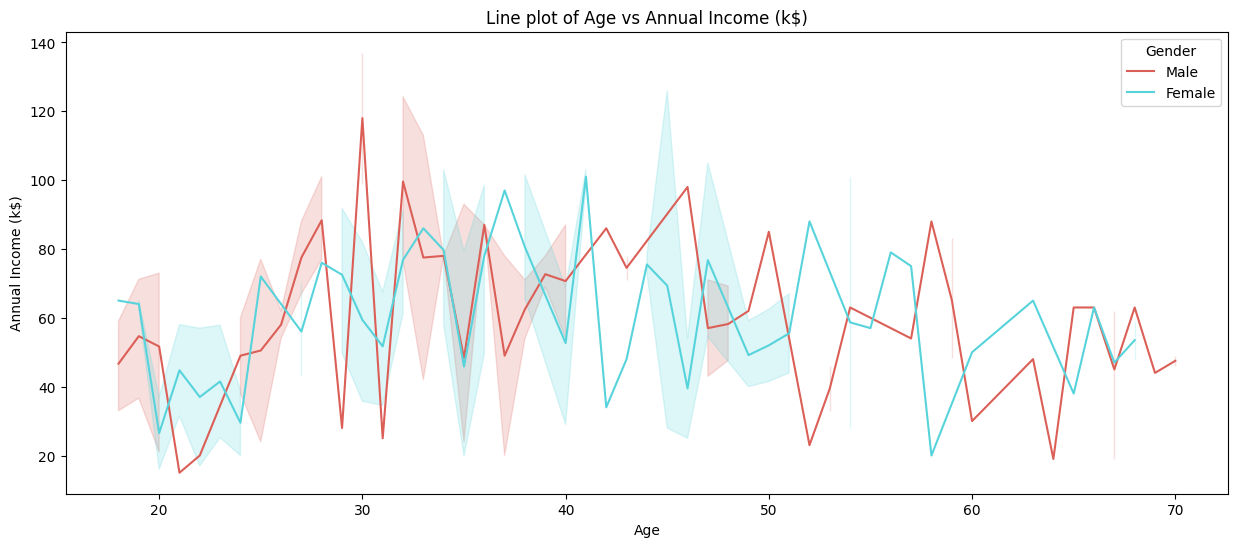

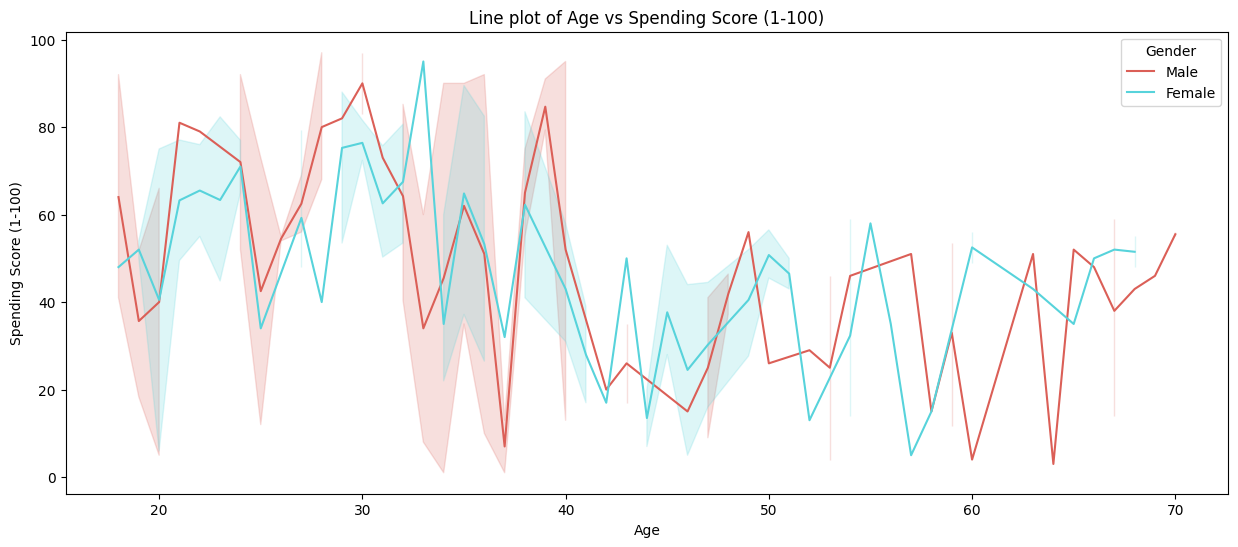

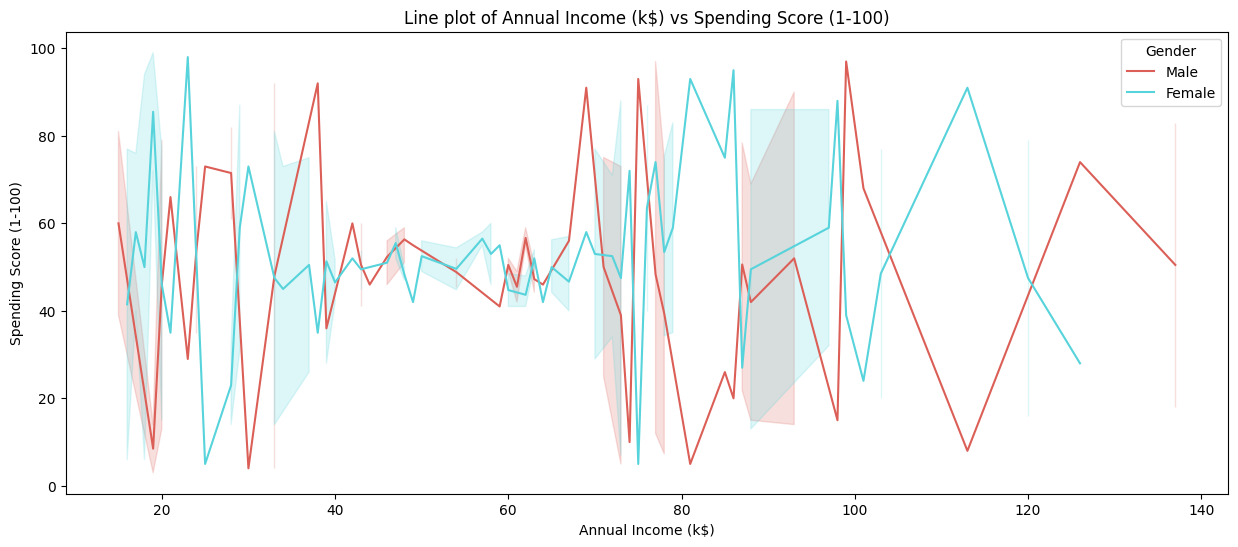

In [29]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, hue = 'Gender', palette='hls')
        plt.title(f'Line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

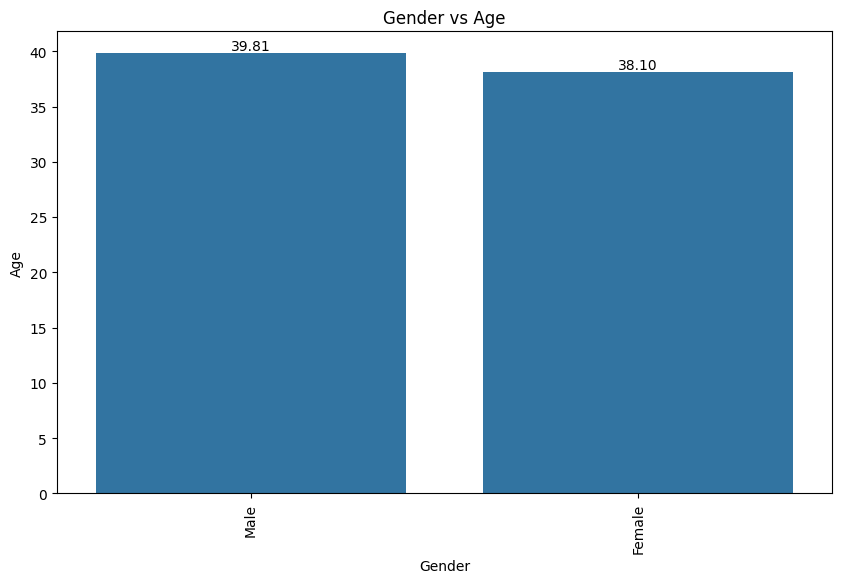

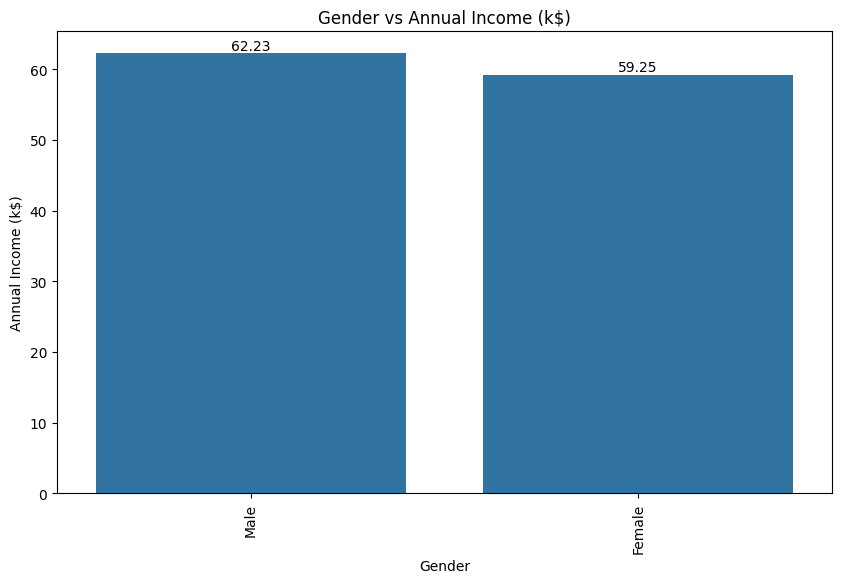

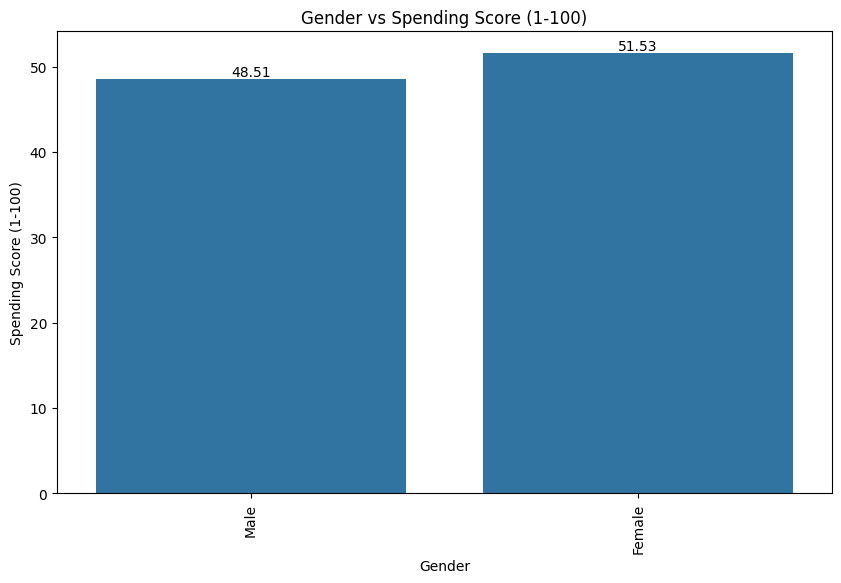

In [30]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

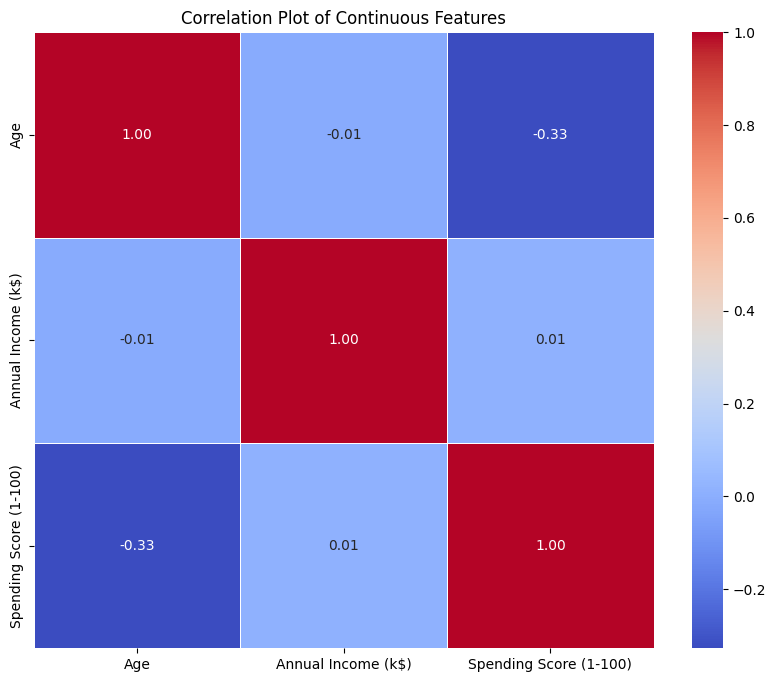

In [32]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [33]:
corr_matrix

Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000

In [34]:
table = pd.pivot_table(df, index = 'Gender')

In [35]:
table

Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364

In [36]:
table = pd.pivot_table(df, index = 'Gender', aggfunc = 'min')

In [37]:
table

Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                 
Female   18                  16                       5
Male     18                  15                       1

In [38]:
table = pd.pivot_table(df, index = 'Gender', aggfunc = 'max')

In [39]:
table

Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                 
Female   68                 126                      99
Male     70                 137                      97

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

In [42]:
scalar=StandardScaler()

In [45]:
df1 = df[continuous]

In [46]:
df1

Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]

In [47]:
scaled_df = scalar.fit_transform(df1)

In [48]:
scaled_df

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
df['Gender'] = le.fit_transform(df['Gender'])

In [52]:
df['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

In [53]:
df

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]

In [55]:
df2 = pd.DataFrame(scaled_df, columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [56]:
df2

Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999               -0.434801
1   -1.281035           -1.738999                1.195704
2   -1.352802           -1.700830               -1.715913
3   -1.137502           -1.700830                1.040418
4   -0.563369           -1.662660               -0.395980
..        ...                 ...                     ...
195 -0.276302            2.268791                1.118061
196  0.441365            2.497807               -0.861839
197 -0.491602            2.497807                0.923953
198 -0.491602            2.917671               -1.250054
199 -0.635135            2.917671                1.273347

[200 rows x 3 columns]

In [58]:
df2['Gender'] = df['Gender']

In [59]:
df2

Age  Annual Income (k$)  Spending Score (1-100)  Gender
0   -1.424569           -1.738999               -0.434801       1
1   -1.281035           -1.738999                1.195704       1
2   -1.352802           -1.700830               -1.715913       0
3   -1.137502           -1.700830                1.040418       0
4   -0.563369           -1.662660               -0.395980       0
..        ...                 ...                     ...     ...
195 -0.276302            2.268791                1.118061       0
196  0.441365            2.497807               -0.861839       0
197 -0.491602            2.497807                0.923953       1
198 -0.491602            2.917671               -1.250054       1
199 -0.635135            2.917671                1.273347       1

[200 rows x 4 columns]

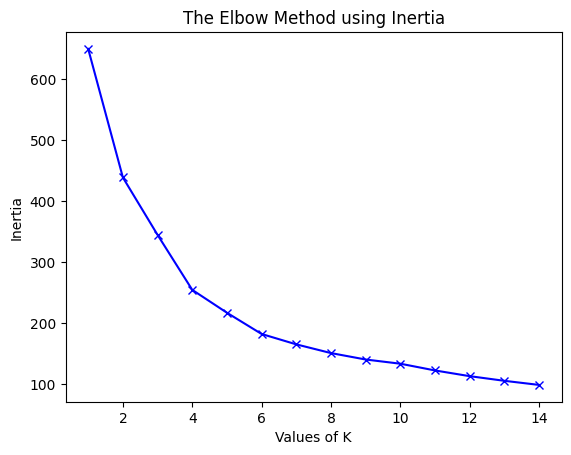

In [60]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(df2)
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [61]:
df3 = df2.copy()

In [69]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(df3)
df_kmeans= pd.concat([df3,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [70]:
df_kmeans

Age  Annual Income (k$)  Spending Score (1-100)  Gender  cluster
0   -1.424569           -1.738999               -0.434801       1        3
1   -1.281035           -1.738999                1.195704       1        3
2   -1.352802           -1.700830               -1.715913       0        3
3   -1.137502           -1.700830                1.040418       0        3
4   -0.563369           -1.662660               -0.395980       0        3
..        ...                 ...                     ...     ...      ...
195 -0.276302            2.268791                1.118061       0        2
196  0.441365            2.497807               -0.861839       0        1
197 -0.491602            2.497807                0.923953       1        2
198 -0.491602            2.917671               -1.250054       1        1
199 -0.635135            2.917671                1.273347       1        2

[200 rows x 5 columns]

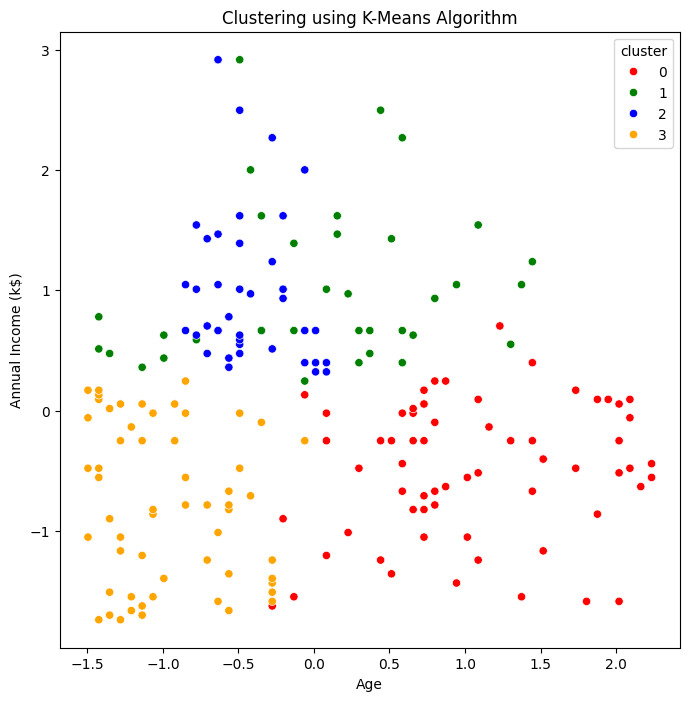

In [71]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x= 'Age',y="Annual Income (k$)",hue="cluster",data=df_kmeans,palette=['red','green', 'blue' , 'orange'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
sil_coeff = silhouette_score(df_kmeans.drop("cluster", axis=1), df_kmeans["cluster"])
print("Silhouette Coefficient:", round(sil_coeff, 3))

Silhouette Coefficient: 0.351


In [74]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(df2)

In [76]:
pca_df_agg = pd.concat([df3,pd.DataFrame({'cluster':cluster.labels_})],axis=1)

In [77]:
pca_df_agg

Age  Annual Income (k$)  Spending Score (1-100)  Gender  cluster
0   -1.424569           -1.738999               -0.434801       1        0
1   -1.281035           -1.738999                1.195704       1        1
2   -1.352802           -1.700830               -1.715913       0        0
3   -1.137502           -1.700830                1.040418       0        1
4   -0.563369           -1.662660               -0.395980       0        0
..        ...                 ...                     ...     ...      ...
195 -0.276302            2.268791                1.118061       0        3
196  0.441365            2.497807               -0.861839       0        2
197 -0.491602            2.497807                0.923953       1        3
198 -0.491602            2.917671               -1.250054       1        2
199 -0.635135            2.917671                1.273347       1        3

[200 rows x 5 columns]

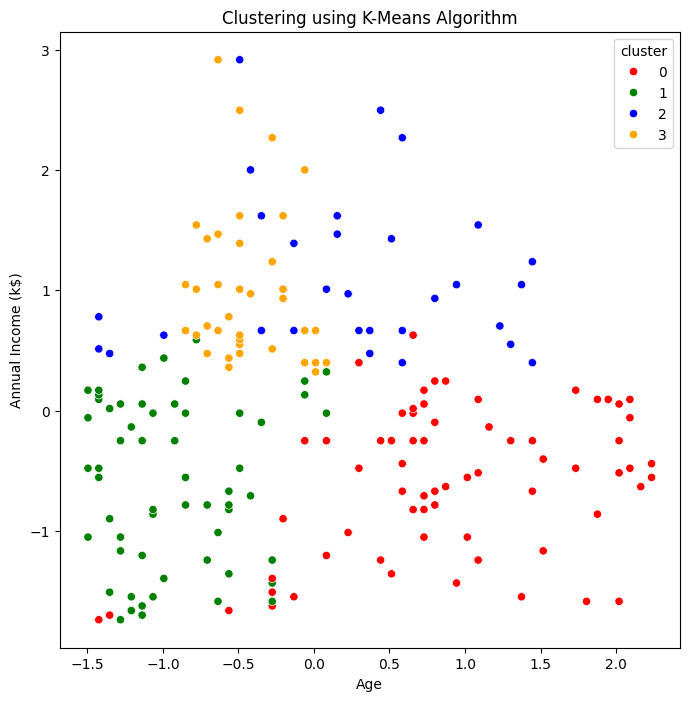

In [78]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x= 'Age',y="Annual Income (k$)",hue="cluster",data=pca_df_agg,palette=['red','green', 'blue' , 'orange'])
plt.title("Clustering using Agglomerative Algorithm")
plt.show()

In [79]:
sil_coeff = silhouette_score(pca_df_agg.drop("cluster", axis=1), pca_df_agg["cluster"])
print("Silhouette Coefficient:", round(sil_coeff, 3))

Silhouette Coefficient: 0.33
